In [52]:
import fitz  
import re
from collections import defaultdict
import matplotlib.pyplot as plt


file_path = '2020-OL-GEN.pdf'
doc = fitz.open(file_path)


text = ''
for page in doc:
    text += page.get_text()

text[:1000]  


'2020 RESULTS: GENERAL CERTIFICATE OF EDUCATION EXAMINATION - ORDINARY LEVEL\nAUTHENTIC GCE RESULTS\nCentre No:  11000 CCAS KUMBA B  \nRegist: 213, Sat for 4 or more Subjects: 101, Passed : 22\n% Passed : 21.78, Sanctioned : 3\nResults of Successful Candidates In Order Of Merit\nPassed In 10 Subjects: 1\nFANGALI FLAVIENNE ENGOR \nBIO-B,CHE-C,ECO-C,ENL-B,FNU-B,GEO-B,HBI-C,MAT-C,PHY-B,RE\nL-C\n(1)\nPassed In 8 Subjects: 4\nGANA PIREST SAVALA \nBIO-B,COM-B,CTZ-B,ECO-A,ENL-C,GEO-C,HIS-A,LIT-C\n(1)\nKOYOH VITALIS NDEH \nCOM-C,CTZ-B,ECO-B,ENL-C,GEO-B,HIS-B,LOG-B,REL-C\n(2)\nPRINCELINE SALAY MOLUA \nAMA-C,BIO-C,CSC-C,ECO-C,ENL-B,GEO-C,MAT-B,PHY-B\n(3)\nDIRAN TANYI OJONG \nCOM-C,CTZ-C,ECO-C,ENL-C,GEO-C,HIS-B,LIT-C,REL-C\n(4)\nPassed In 7 Subjects: 8\nEBAKO ESHIE DOROTHY \nACC-C,COM-B,ECO-A,ENL-B,GEO-C,HIS-B,LIT-A\n(1)\nABWE SAMSON SUBE \nBIO-B,CTZ-B,ECO-B,ENL-C,GEO-B,HIS-A,REL-C\n(2)\nBOBE VALERY STACEY NJUMA \nCOM-B,CTZ-B,ECO-C,ENL-C,GEO-B,HIS-C,LIT-C\n(3)\nKANG MARGRET BESUMBU \nCOM-C,CTZ-C,

In [53]:
grade_to_points = {
    'A': 3,
    'B': 2,
    'C': 1,
}

pattern = re.compile(r'([A-Z\s]+)\s*([A-Z\n]{3,5}-[A-E](?:,\s*[A-Z\n]{3,5}-[A-E])*)\s*\(\d+\)')

class Record:
    def __init__(self, record):
        self.name, self.grades = sanitize_record(record)
        self.points = calculate_points(self.grades)
    
    def __repr__(self):
        # return f"{self.name}: {self.points} points -> {self.grades}"
        return f"{self.points} points -> {self.grades}"
    
    def __str__(self) -> str:
        return self.__repr__()

class GradeDist:
    def __init__(self) -> None:
        self.names = []
        self.count = 0
    
    def add(self, name):
        self.names.append(name)
        self.count += 1
    
    def __str__(self) -> str:
        return f"{self.count}"  
    
    def __repr__(self) -> str:
        return f"{self.count}"

def calculate_points(grades):
    total_points = 0
    for grade in grades.values():
        total_points += grade_to_points[grade]
    return total_points

def sanitize_record(record):
    name, grades_str = record
    grades = {}
    for t_grade in grades_str.split(','):
        if "-" not in t_grade:
            continue
        subject, grade = t_grade.split('-')
        subject = "".join(subject.split("\n"))
        grades[subject.strip()] = grade.strip()

    return name.strip(), grades


def return_first_n_chars_or_fill_with_spaces(text):
    n = 30
    return text[:n] + " " * (n - len(text[:n]))

In [54]:
candidates = pattern.findall(text)
dict_candidates = { candidate[0].strip(): Record(candidate) for candidate in candidates }
grade_distribution = defaultdict(GradeDist)
# Summary of candidates
print(f"Total number of candidates: {len(dict_candidates)}")

Total number of candidates: 47083


In [55]:
dict_candidates["FANGALI FLAVIENNE ENGOR"]

15 points -> {'BIO': 'B', 'CHE': 'C', 'ECO': 'C', 'ENL': 'B', 'FNU': 'B', 'GEO': 'B', 'HBI': 'C', 'MAT': 'C', 'PHY': 'B', 'REL': 'C'}

In [56]:
def top_n_percent(grade_distribution, grade):
    total_candidates = len(dict_candidates)
    candidates_considered = 0
    while grade <= 33:
        candidates_considered += grade_distribution[grade].count
        grade += 1
    return candidates_considered / total_candidates * 100

In [57]:


for ind, candidate in enumerate(dict_candidates):
    if ind == 10:
        break
    print(candidate, dict_candidates[candidate])

FANGALI FLAVIENNE ENGOR 15 points -> {'BIO': 'B', 'CHE': 'C', 'ECO': 'C', 'ENL': 'B', 'FNU': 'B', 'GEO': 'B', 'HBI': 'C', 'MAT': 'C', 'PHY': 'B', 'REL': 'C'}
GANA PIREST SAVALA 15 points -> {'BIO': 'B', 'COM': 'B', 'CTZ': 'B', 'ECO': 'A', 'ENL': 'C', 'GEO': 'C', 'HIS': 'A', 'LIT': 'C'}
KOYOH VITALIS NDEH 13 points -> {'COM': 'C', 'CTZ': 'B', 'ECO': 'B', 'ENL': 'C', 'GEO': 'B', 'HIS': 'B', 'LOG': 'B', 'REL': 'C'}
PRINCELINE SALAY MOLUA 11 points -> {'AMA': 'C', 'BIO': 'C', 'CSC': 'C', 'ECO': 'C', 'ENL': 'B', 'GEO': 'C', 'MAT': 'B', 'PHY': 'B'}
DIRAN TANYI OJONG 9 points -> {'COM': 'C', 'CTZ': 'C', 'ECO': 'C', 'ENL': 'C', 'GEO': 'C', 'HIS': 'B', 'LIT': 'C', 'REL': 'C'}
EBAKO ESHIE DOROTHY 14 points -> {'ACC': 'C', 'COM': 'B', 'ECO': 'A', 'ENL': 'B', 'GEO': 'C', 'HIS': 'B', 'LIT': 'A'}
ABWE SAMSON SUBE 13 points -> {'BIO': 'B', 'CTZ': 'B', 'ECO': 'B', 'ENL': 'C', 'GEO': 'B', 'HIS': 'A', 'REL': 'C'}
BOBE VALERY STACEY NJUMA 10 points -> {'COM': 'B', 'CTZ': 'B', 'ECO': 'C', 'ENL': 'C', 'GEO

<BarContainer object of 30 artists>

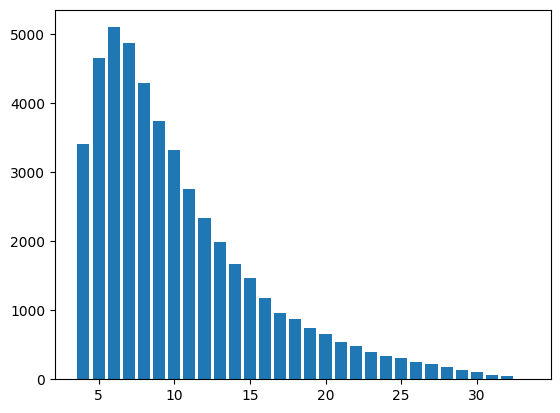

In [58]:
grade_distribution = defaultdict(GradeDist)
for candidate in dict_candidates:
    grade_distribution[dict_candidates[candidate].points].add(candidate)

plt.bar(grade_distribution.keys(), [grade_distribution[key].count for key in grade_distribution.keys()])

In [59]:
print("Points \t: \tNumber of candidates \t: \tTop n% of candidates")
print("------ \t: \t--------------------- \t: \t--------------------")
for key in sorted(grade_distribution.keys(), reverse=True):
    print(f"{key}\t: \t\t{grade_distribution[key]} \t\t: \t\t{top_n_percent(grade_distribution, key):.2f}%")

Points 	: 	Number of candidates 	: 	Top n% of candidates
------ 	: 	--------------------- 	: 	--------------------
33	: 		6 		: 		0.01%
32	: 		50 		: 		0.12%
31	: 		68 		: 		0.26%
30	: 		104 		: 		0.48%
29	: 		140 		: 		0.78%
28	: 		171 		: 		1.14%
27	: 		222 		: 		1.62%
26	: 		250 		: 		2.15%
25	: 		310 		: 		2.81%
24	: 		339 		: 		3.53%
23	: 		396 		: 		4.37%
22	: 		476 		: 		5.38%
21	: 		547 		: 		6.54%
20	: 		653 		: 		7.93%
19	: 		747 		: 		9.51%
18	: 		877 		: 		11.38%
17	: 		960 		: 		13.41%
16	: 		1182 		: 		15.93%
15	: 		1469 		: 		19.05%
14	: 		1663 		: 		22.58%
13	: 		1984 		: 		26.79%
12	: 		2329 		: 		31.74%
11	: 		2762 		: 		37.60%
10	: 		3324 		: 		44.66%
9	: 		3735 		: 		52.60%
8	: 		4294 		: 		61.72%
7	: 		4870 		: 		72.06%
6	: 		5097 		: 		82.89%
5	: 		4654 		: 		92.77%
4	: 		3404 		: 		100.00%


In [60]:
## All 25 points candidates

print(f"Total {grade_distribution[33].count} candidates with 33 points")
print(f"Candidates with 33 points(top {top_n_percent(grade_distribution, 33):.2f}%):")
for candidate in grade_distribution[33].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 6 candidates with 33 points
Candidates with 33 points(top 0.01%):
	 NCHIA DZE DESMOND              	 33 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 NGEBENUI QUEENCY               	 33 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 DZOSSA BONTSE AUBIN VERTUEUX   	 33 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 NJOGHO ANN ANIM                	 33 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 DOUANLA FOUODJEU ROMARIC SYLVE 	 33 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 JOSSI   SAGWON   FORT

In [61]:
## All 32 points candidates

print(f"Total {grade_distribution[32].count} candidates with 32 points")
print(f"Candidates with 32 points(top {top_n_percent(grade_distribution, 32):.2f}%):")
for candidate in grade_distribution[32].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 50 candidates with 32 points
Candidates with 32 points(top 0.12%):
	 FOADIENG KEPSEU ARMANDE FLOREN 	 32 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B'}
	 FONCHAM PRECIOUS ANDIN         	 32 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B'}
	 FOTANG NOLEFACK TANO           	 32 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 NGWI SAMA BRIGHT               	 32 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 FONYUY BERKA DZEKEM JUNIOR     	 32 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 NJONG MBECHU KONTAR 

In [62]:
## All 31 points candidates

print(f"Total {grade_distribution[31].count} candidates with 31 points")
print(f"Candidates with 31 points(top {top_n_percent(grade_distribution, 31):.2f}%):")
for candidate in grade_distribution[31].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 68 candidates with 31 points
Candidates with 31 points(top 0.26%):
	 SEVIDZEM MARILYN MAIKA         	 31 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'C', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 KUMBONG MAXWELL BERINYUY       	 31 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'B', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 NGWAH THIERRY ASHERI           	 31 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'B', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 TITAGWAN BRADLEY GENE          	 31 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B'}
	 NGELAH IGMA TANYIE             	 31 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'B', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 YANNI ARREY ETCHI   

In [63]:
## All 30 points candidates

print(f"Total {grade_distribution[30].count} candidates with 30 points")
print(f"Candidates with 30 points(top {top_n_percent(grade_distribution, 30):.2f}%):")
for candidate in grade_distribution[30].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 104 candidates with 30 points
Candidates with 30 points(top 0.48%):
	 FEKAM DJUIKOM ANGE SHALOM      	 30 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B', 'SBRF': 'B'}
	 NKOUONLACK NGUEKA KATHLEEN     	 30 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'B', 'REL': 'B'}
	 ACHALE OMA EBOBNSONYA          	 30 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'B', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B'}
	 VISISIMBOM JOSEPH FERDRICK     	 30 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'ECO': 'A', 'ENL': 'A', 'FRE': 'C', 'GEO': 'A', 'HBI': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 ABDULFARIS KESTER SANI         	 30 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'B', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B'}
	 BAH AWAZI DIVINE F

In [64]:
## All 29 points candidates

print(f"Total {grade_distribution[29].count} candidates with 29 points")
print(f"Candidates with 29 points(top {top_n_percent(grade_distribution, 29):.2f}%):")
for candidate in grade_distribution[29].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 140 candidates with 29 points
Candidates with 29 points(top 0.78%):
	 NANA NGANOU EMMANUELLE         	 29 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'HBI': 'A', 'MAT': 'A', 'PHY': 'A'}
	 FIDJIO TSOMEZA GIBRIL          	 29 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'ECO': 'A', 'ENL': 'B', 'FRE': 'A', 'GEO': 'A', 'HBI': 'A', 'MAT': 'A', 'PHY': 'A'}
	 EYOG JOSEPH EMMANUEL           	 29 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'B', 'LOG': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'C'}
	 NGO TENG BALENLA NGUIMBOUS CHR 	 29 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A'}
	 ENONGENE PRECIOUS MBINDE       	 29 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'HBI': 'A', 'MAT': 'A', 'PHY': 'A'}
	 JANE AHONE ELOUNDOU            	 29 points -> {'AMA': 'A', 'BIO': '

In [65]:
## All 28 points candidates

print(f"Total {grade_distribution[28].count} candidates with 28 points")
print(f"Candidates with 28 points(top {top_n_percent(grade_distribution, 28):.2f}%):")
for candidate in grade_distribution[28].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 171 candidates with 28 points
Candidates with 28 points(top 1.14%):
	 NGERNYU CALEB TATA             	 28 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'B'}
	 ROSE SHARON ANCHI TANGA        	 28 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'C', 'GEO': 'B', 'MAT': 'A', 'PHY': 'A', 'REL': 'B'}
	 NKEM JEFERSON ACHIA            	 28 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'C', 'GEO': 'A', 'MAT': 'A', 'PHY': 'B', 'REL': 'B'}
	 AMUNGWA AMARNWE BRIDGET        	 28 points -> {'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'C', 'GEO': 'A', 'HBI': 'A', 'MAT': 'A', 'PHY': 'B', 'REL': 'B'}
	 TENDONGFOR NICK JUNIOR NJUOKIA 	 28 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'B', 'REL': 'B', 'SBRF': 'C'}
	 NTABE WINNER ABO              

In [66]:
## All 27 points candidates

print(f"Total {grade_distribution[27].count} candidates with 27 points")
print(f"Candidates with 27 points(top {top_n_percent(grade_distribution, 27):.2f}%):")
for candidate in grade_distribution[27].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 222 candidates with 27 points
Candidates with 27 points(top 1.62%):
	 DEUTOU TCHAMENI REBECCA GISELE 	 27 points -> {'AMA': 'A', 'BIO': 'B', 'CHE': 'B', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'HBI': 'B', 'MAT': 'A', 'PHY': 'A'}
	 CHIAKENI GENA NDISI            	 27 points -> {'AMA': 'B', 'BIO': 'A', 'CHE': 'B', 'ECO': 'A', 'ENL': 'A', 'FRE': 'C', 'GEO': 'A', 'HBI': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'C'}
	 MFOBUJONG PRECIOUS NKENWI SUH  	 27 points -> {'BIO': 'A', 'CHE': 'C', 'CSC': 'A', 'ECO': 'A', 'ENL': 'B', 'FRE': 'A', 'GEO': 'A', 'HBI': 'B', 'MAT': 'B', 'PHY': 'B', 'REL': 'A'}
	 TOMOH CLAUDE IKFINGEH          	 27 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'B', 'ECO': 'A', 'ENL': 'A', 'FRE': 'C', 'GEO': 'A', 'HBI': 'A', 'MAT': 'A', 'PHY': 'A'}
	 BANADZEM THIERRY NYUYKONGI     	 27 points -> {'BIO': 'A', 'CHE': 'C', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'GEO': 'A', 'HBI': 'A', 'MAT': 'A', 'PHY': 'B', 'REL': 'B', 'SBRF': 'C'}
	 TALETEH NJEM NGENKENG COURAGE  	 27 points